In [80]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [81]:
df = pd.read_csv('IRIS.csv')#driver's data.csv

In [82]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [84]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [87]:
df.shape

(150, 5)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [90]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

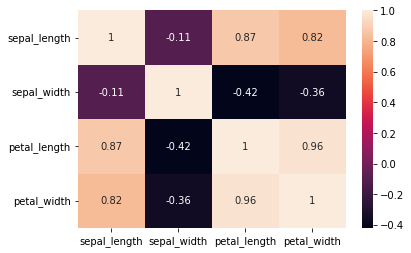

In [91]:
#finding correlation of features 
correl=df.corr()
sns.heatmap(correl,annot=True)

Text(0.5, 1.0, 'Scatter Plot')

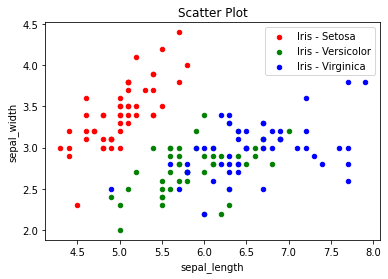

In [92]:
ax = df[df.species=='Iris-setosa'].plot.scatter(x='sepal_length', y='sepal_width', color='red', label='Iris - Setosa')
df[df.species=='Iris-versicolor'].plot.scatter(x='sepal_length', y='sepal_width', color='green', label='Iris - Versicolor', ax=ax)
df[df.species=='Iris-virginica'].plot.scatter(x='sepal_length', y='sepal_width', color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

In [94]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [95]:
#finding different class labels 
np.unique(df['species'])

array([0, 1, 2])

In [97]:
df.shape

(150, 5)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
sc = StandardScaler()

In [111]:
x = sc.fit_transform(x)

In [112]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

C:\Users\RDRL\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [113]:
y_kmeans = kmeans.fit_predict(x)

C:\Users\RDRL\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


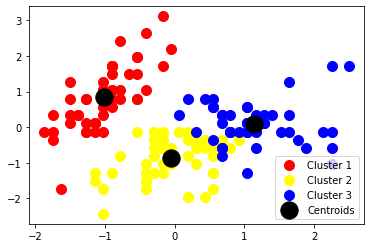

In [116]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1] , s = 100 , c= "red" , label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1] , s = 100 , c= "yellow" , label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1] , s = 100 , c= "blue" , label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.legend()
plt.show()